# Initial Signal Processing

This notebook contains an initial signal processing analysis attempt. The tasks at hand are:
- [Scaling and Normalization](#scaling--normalization)
- applying lowpass/highpass filters on the signal
- [Performing STFT](#stft)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [5]:
# Open the .txt containing the sensor output
# and then store the values for plotting

FILENAME = "tests/rock.txt"

with open(FILENAME, "r") as f:
  temp = f.read().splitlines()

num_points = len(temp)
data = np.zeros((3, num_points))
for c, t in enumerate(temp):
  split = t.split(',')
  data[0][c] = split[0]
  data[1][c] = split[1]
  data[2][c] = split[2]
  
print(data.shape)

(3, 349)


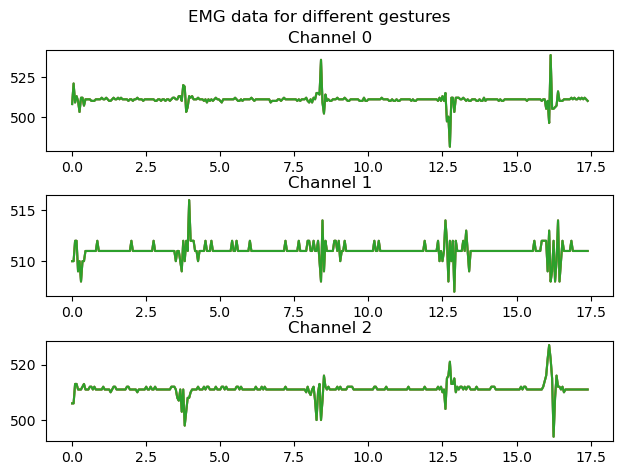

In [6]:
# 50 milliseconds delay in between samples, so create time axis for plot
fig, axs = plt.subplots(len(data))
fig.suptitle('EMG data for different gestures')
fig.tight_layout()

for c, i in enumerate(data):
  time_axis = np.array([i/1000 for i in range(0, 50 * data.shape[1], 50)])
  axs[c].plot(time_axis, i)
  axs[c].plot(time_axis, i)
  axs[c].plot(time_axis, i)
  axs[c].set_title(f"Channel {c}")

plt.show()

## Scaling & Normalization

Normalize and scale the sensor readings to be centered on 0 and with an interval of [-1, 1]

In [7]:
for a in range(len(data)):
  # as you want your data to be between -1 and 1, everything should be scaled to 2, 
  # if your desired min and max are other values, replace 2 with your_max - your_min
  ratio = 2 / (np.max(data[a]) - np.min(data[a])) 
  shift = (np.max(data[a]) + np.min(data[a])) / 2 
  # now you need to shift the center to the middle, this is not the average of the values.
  data[a] = (data[a] - shift) * ratio

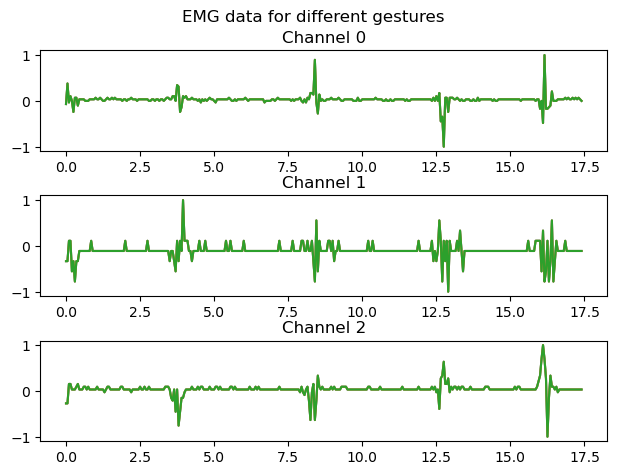

In [8]:
# 50 milliseconds delay in between samples, so create time axis for plot
fig, axs = plt.subplots(len(data))
fig.suptitle('EMG data for different gestures')
fig.tight_layout()

for c, i in enumerate(data):
  time_axis = np.array([i/1000 for i in range(0, 50 * data.shape[1], 50)])
  axs[c].plot(time_axis, i)
  axs[c].plot(time_axis, i)
  axs[c].plot(time_axis, i)
  axs[c].set_title(f"Channel {c}")

plt.show()

## STFT

Perform an STFT to transform the data

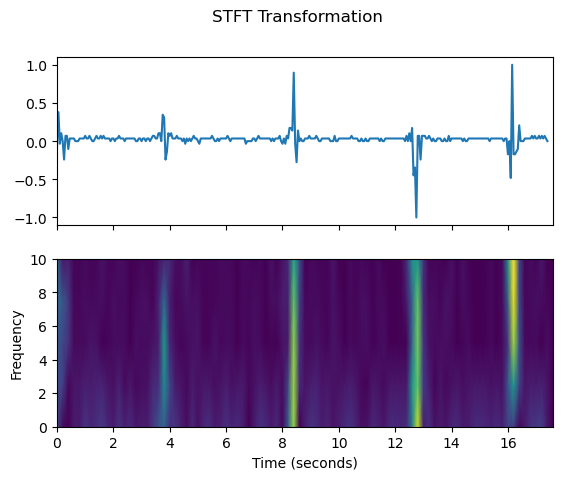

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

ax1.plot(time_axis, data[0])
f, t, Zxx = signal.stft(data[0], nperseg=8, fs=20)
ax2.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
ax2.set_xlabel("Time (seconds)")
ax2.set_ylabel("Frequency")
fig.suptitle("STFT Transformation")
plt.show()

In [10]:
print(f)

[ 0.   2.5  5.   7.5 10. ]
